In [1]:
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

# download data from internet (only the first time) and split it into training and testing set
(imgTrain, labelTrain), (imgTest, labelTest) = mnist.load_data()

In [3]:
from keras import backend as K

imgRows, imgCols = 28, 28 # size of source image

# reshape images in training and testing set into fake 3D
if K.image_data_format() == 'channels_first':
    imgTrain = imgTrain.reshape(imgTrain.shape[0], 1, imgRows, imgCols)
    imgTest  = imgTest.reshape(imgTest.shape[0], 1, imgRows, imgCols)
    smpSize  = (1, imgRows, imgCols)
else:
    imgTrain = imgTrain.reshape(imgTrain.shape[0], imgRows, imgCols, 1)
    imgTest  = imgTest.reshape(imgTest.shape[0], imgRows, imgCols, 1)
    smpSize  = (imgRows, imgCols, 1)

# convert pixels to floats and map them into range of [0,1]
imgTrain = imgTrain.astype('float') / 255
imgTest  = imgTest.astype('float') / 255

# show shape and type of our datasets
print('Training set in shape of ', imgTrain.shape, ' with element type ', type(imgTrain.item(0)))
print('Testing set in shape of  ', imgTest.shape, ' with element type ', type(imgTrain.item(0)))

Training set in shape of  (60000, 28, 28, 1)  with element type  <class 'float'>
Testing set in shape of   (10000, 28, 28, 1)  with element type  <class 'float'>


In [4]:
ncat = 10 # number of categories in our problem

# convert labels to one-hot vectors
onehotTrain = keras.utils.to_categorical(labelTrain, ncat)
onehotTest  = keras.utils.to_categorical(labelTest, ncat)

In [5]:
# claim a sequential model
model = Sequential()

# add first layer as convolution transformation with 32 filters of size [3, 3]
# - 'activation' is the non-linear tranform used in neural network, a common one is 'sigmoid'
# - for the first layer, you also need to claim size of input samples
model.add(Conv2D(4, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=smpSize))
model.add(Conv2D(8, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=smpSize))
# add max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=smpSize))
model.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=smpSize))
# add max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# add flatten layer to reshape data to fit for linear transform
model.add(Flatten())
# linear transofrm with activation of softmax
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(ncat, activation='softmax'))

In [6]:
# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [7]:
n, h, w, channel = imgTrain.shape
X = np.reshape(imgTrain,(n, h*w*channel))
print("Number of images:", X.shape[0], "| Vector Size:", X.shape[1])

Number of images: 60000 | Vector Size: 784


In [8]:
pca = PCA() 
X_transformed = pca.fit_transform(X)
trainSet = np.reshape(X_transformed,(n,h,w,channel))

In [9]:
n_test = imgTest.shape[0]
X_test = np.reshape(imgTest,(n_test, h*w*channel))
print("Number of images:", X_test.shape[0], "| Vector Size:", X_test.shape[1])

Number of images: 10000 | Vector Size: 784


In [10]:
X_transformed_test = pca.transform(X_test)
testSet = np.reshape(X_transformed_test,(n_test,h,w,channel))

In [11]:
model.fit(trainSet, onehotTrain, validation_data=(testSet, onehotTest), batch_size=128, epochs=3, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 38s 638us/step - loss: 1.4455 - acc: 0.4857 - val_loss: 0.6395 - val_acc: 0.7962
Epoch 2/3
60000/60000 [==============================] - 39s 648us/step - loss: 0.4882 - acc: 0.8479 - val_loss: 0.3771 - val_acc: 0.8836
Epoch 3/3
60000/60000 [==============================] - 39s 650us/step - loss: 0.3217 - acc: 0.9008 - val_loss: 0.2832 - val_acc: 0.9104


In [12]:
score = model.evaluate(testSet, onehotTest, verbose=0)
print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.2831570485055447
Test accuracy : 0.9104


In [13]:
print(imgTest.shape)

(10000, 28, 28, 1)


In [14]:
def plot_vector(vec):
    size = 28
    img = vec.reshape(size, size)
    return img

(60000, 784)


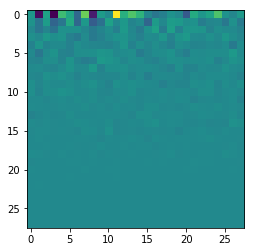

In [15]:
print(X_transformed.shape)
plt.imshow(plot_vector(X_transformed[255,:]))